<a href="https://colab.research.google.com/github/wahid205/Team-ID-20/blob/main/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3.cfg")
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data(path="./yolov3-tiny.weights")


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.9534 - accuracy: 0.8681
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3693 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2767 - accuracy: 0.9338
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2496 - accuracy: 0.9387
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2250 - accuracy: 0.9463


In [ ]:
classes = None
with open("./coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [ ]:
img = cv2.imread("./crosswalk-featured.jpg")

Width = img.shape[1]
Height = img.shape[0]
scale = 0.00392

blob = cv2.dnn.blobFromImage(img, scale, (416,416), (0,0,0), True, crop=False)
yolo.setInput(blob)

In [ ]:
out_layers = yolo.getUnconnectedOutLayersNames()
layersoutput = yolo.forward(out_layers)

def detection_box(img, class_id, confidence, x, y, xw, yh):

    label = str(classes[class_id])
    confi = str(round(confidences[i],2))

    cv2.rectangle(img, (x,y), (xw,yh), (0,255,0), 2)

    cv2.putText(img, label+" "+confi, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

In [ ]:
class_ids = []
confidences = []
boxes = []

for out in layersoutput:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.7:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [ ]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    detection_box(img, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

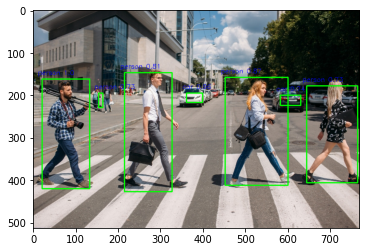

In [ ]:
newimge = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(newimge)